# Inputs

In [1]:
import pandas as pd
import numpy as np
np.random.seed(2121)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
batpos = pd.read_csv('../data/batpos_feature_extracted.csv')

# Run DF Creation

Want to investigate how to get an estimation for total runs in a season using previous 3 years

In [3]:
rdf = batpos.copy()

In [4]:
rdf['runs_total_pg'] = rdf['runs_bat_pg']+rdf['runs_br_pg']+\
                          rdf['runs_dp_pg']+rdf['runs_defense_pg']+\
                          rdf['runs_position_pg']

In [5]:
# remove all present-day stat vars

cols = ['waa_pg','g', 'team_gp',
       'pa_pg', 'inn_pg', 'runs_bat_pg', 'runs_br_pg', 'runs_dp_pg',
       'runs_defense_pg', 'runs_position_pg', 'opprpg',
       'percent_team_gp', 'pa_per_team_gp',
       'inn_per_team_gp', 'g_c_share', 'g_1b_share', 'g_2b_share',
       'g_3b_share', 'g_ss_share', 'g_cf_share', 'g_dh_share', 'g_cof_share']

for c in cols:
    rdf.drop(c, axis=1, inplace=True)

In [7]:
rdf.drop(['opprpg_1yr', 'opprpg_2yr', 'opprpg_3yr',
           'waa_pg_1yr',
       'waa_pg_2yr', 'waa_pg_3yr'],
         axis = 1,
         inplace = True)

# Run DF EDA

In [9]:
rdf.to_csv('../data/rdf.csv')

In [9]:
def triple_regplot(features, target):
    fig, ax = plt.subplots(1,3,figsize=(21,7))
    
    sns.regplot(x=features[0], y=target, data=rdf,
                scatter_kws={'alpha':0.2},
                line_kws={'color': 'red'},
                ax=ax[0])\
    .set(title=target+' vs '+features[0]+'\nCorr:'+\
         str(round(rdf.corr().loc[target,features[0]],2)))
    
    sns.regplot(x=features[1], y=target, data=rdf,
            color='rebeccapurple',
            scatter_kws={'alpha':0.2},
            line_kws={'color': 'red'},
            ax=ax[1])\
    .set(title=target+' vs '+features[1]+'\nCorr:'+\
         str(round(rdf.corr().loc[target,features[1]],2)))

    sns.regplot(x=features[2], y=target, data=rdf,
                color='darkseagreen',
                scatter_kws={'alpha':0.2},
                line_kws={'color': 'red'},
                ax=ax[2])\
    .set(title=target+' vs '+features[2]+'\nCorr:'+\
         str(round(rdf.corr().loc[target,features[2]],2)))

## `g` vars

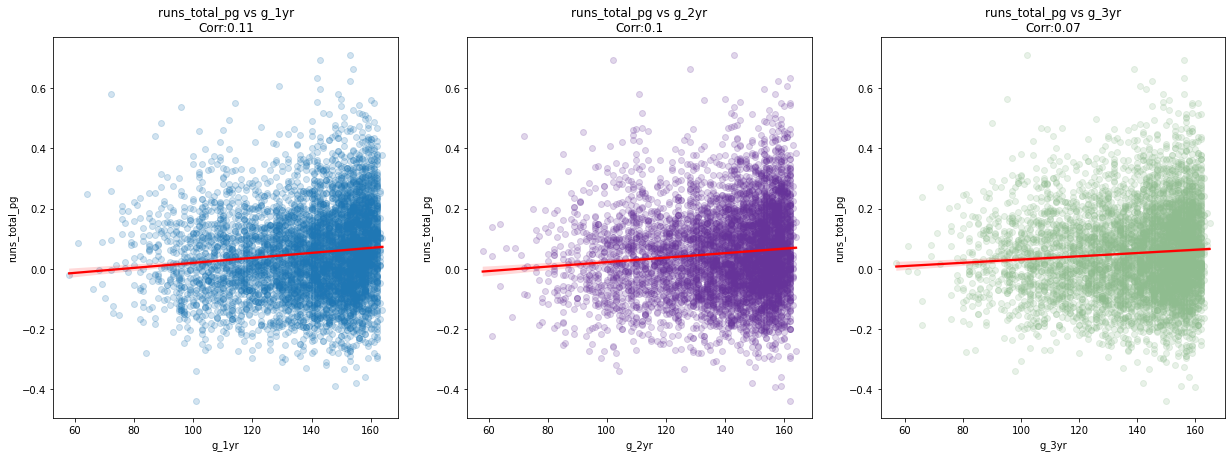

In [10]:
triple_regplot(['g_1yr','g_2yr','g_3yr'], 'runs_total_pg')

In [11]:
# drop
rdf.drop('g_3yr', axis=1, inplace=True)

`team_gp`

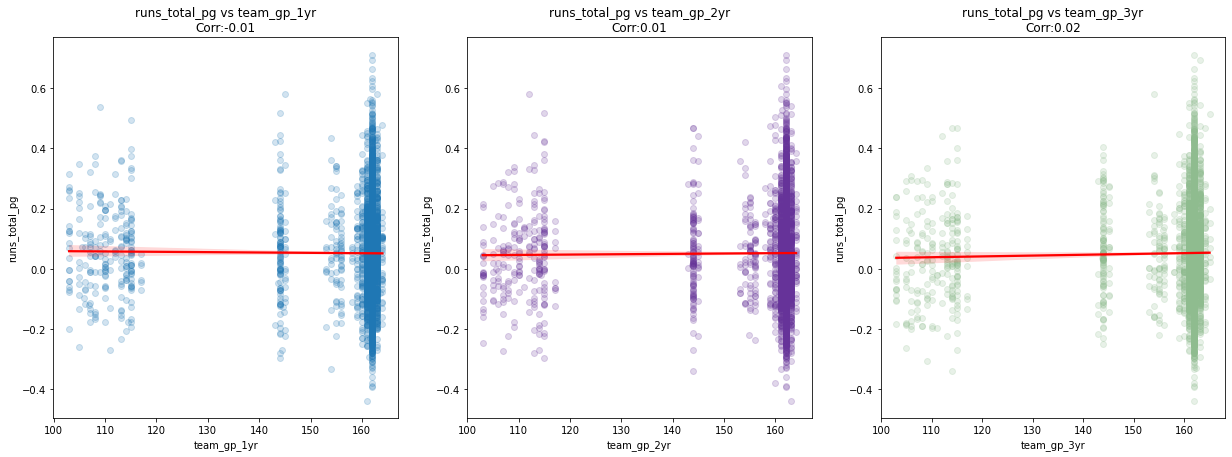

In [12]:
triple_regplot(['team_gp_1yr','team_gp_2yr','team_gp_3yr'], 'runs_total_pg')

**Observation** This really does not have much of an effect at all. Drop it

In [13]:
# drop
rdf.drop(['team_gp_1yr','team_gp_2yr','team_gp_3yr'],
         axis=1,
         inplace=True)

`pa_pg`

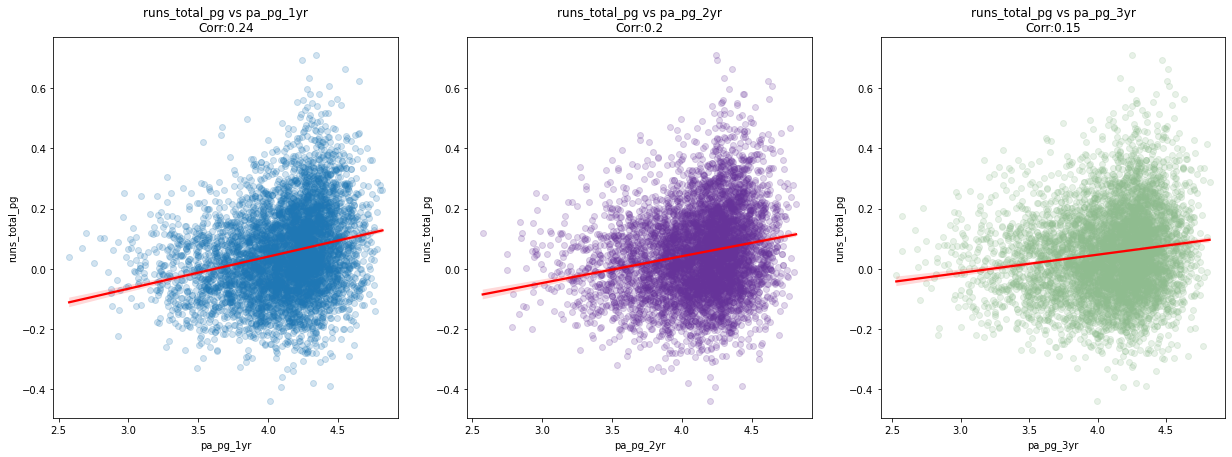

In [14]:
triple_regplot(['pa_pg_1yr','pa_pg_2yr','pa_pg_3yr'], 'runs_total_pg')

`inn_pg`

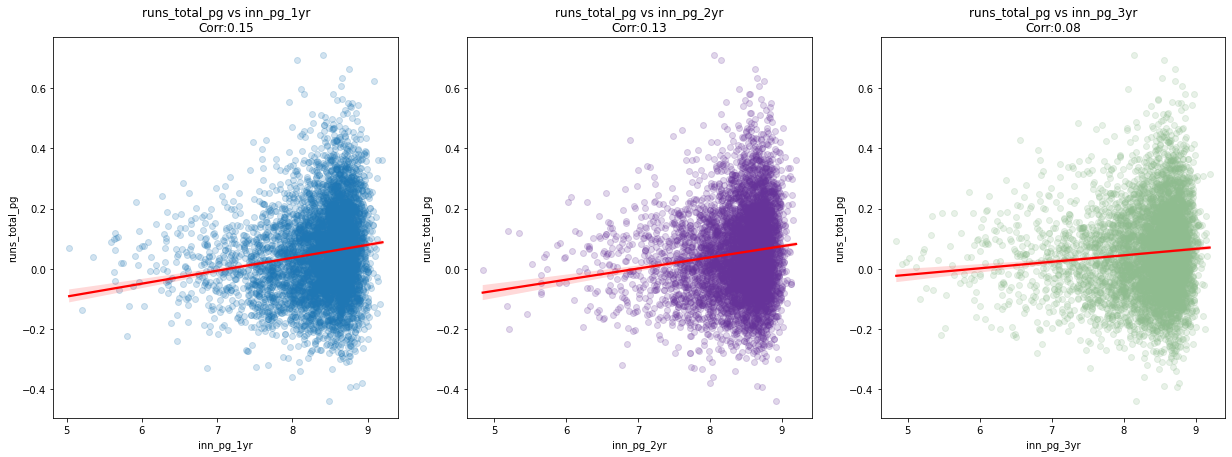

In [15]:
triple_regplot(['inn_pg_1yr','inn_pg_2yr','inn_pg_3yr'], 'runs_total_pg')

In [16]:
rdf.corr().loc[['inn_pg_1yr','inn_pg_2yr','inn_pg_3yr'],
               ['inn_pg_1yr','inn_pg_2yr','inn_pg_3yr']]

,inn_pg_1yr,inn_pg_2yr,inn_pg_3yr
inn_pg_1yr,1.000000,0.524393,0.357066
inn_pg_2yr,0.524393,1.000000,0.495919
inn_pg_3yr,0.357066,0.495919,1.000000


In [17]:
# drop
rdf.drop('inn_pg_3yr', axis=1, inplace=True)

`runs_bat_pg`

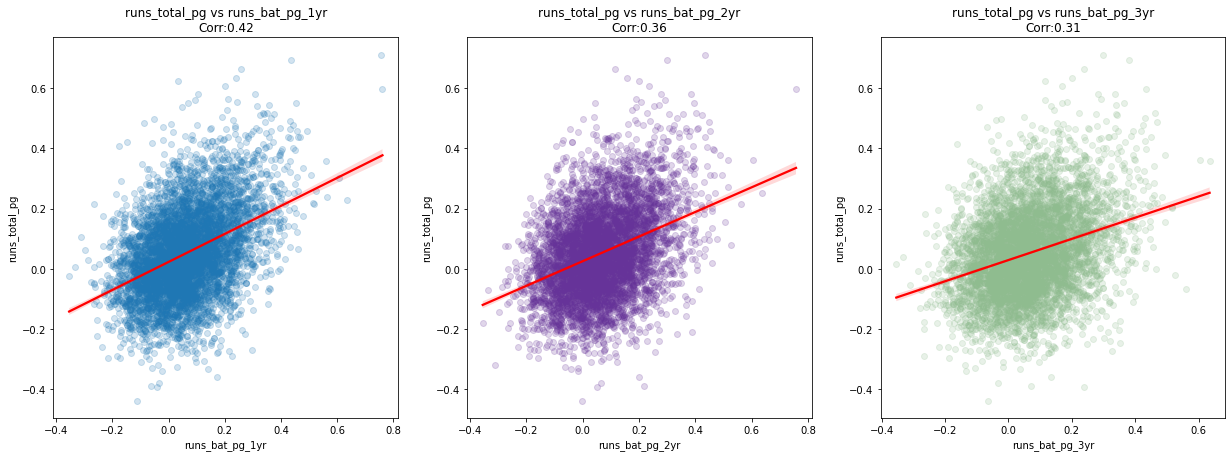

In [18]:
triple_regplot(['runs_bat_pg_1yr','runs_bat_pg_2yr','runs_bat_pg_3yr'], 'runs_total_pg')

**Observation** Pretty strong correlation with the 1_yr variable.

In [19]:
rdf.corr().loc[['runs_bat_pg_1yr','runs_bat_pg_2yr','runs_bat_pg_3yr'],
               ['runs_bat_pg_1yr','runs_bat_pg_2yr','runs_bat_pg_3yr']]

,runs_bat_pg_1yr,runs_bat_pg_2yr,runs_bat_pg_3yr
runs_bat_pg_1yr,1.000000,0.588834,0.546189
runs_bat_pg_2yr,0.588834,1.000000,0.580770
runs_bat_pg_3yr,0.546189,0.580770,1.000000


`runs_br_pg`

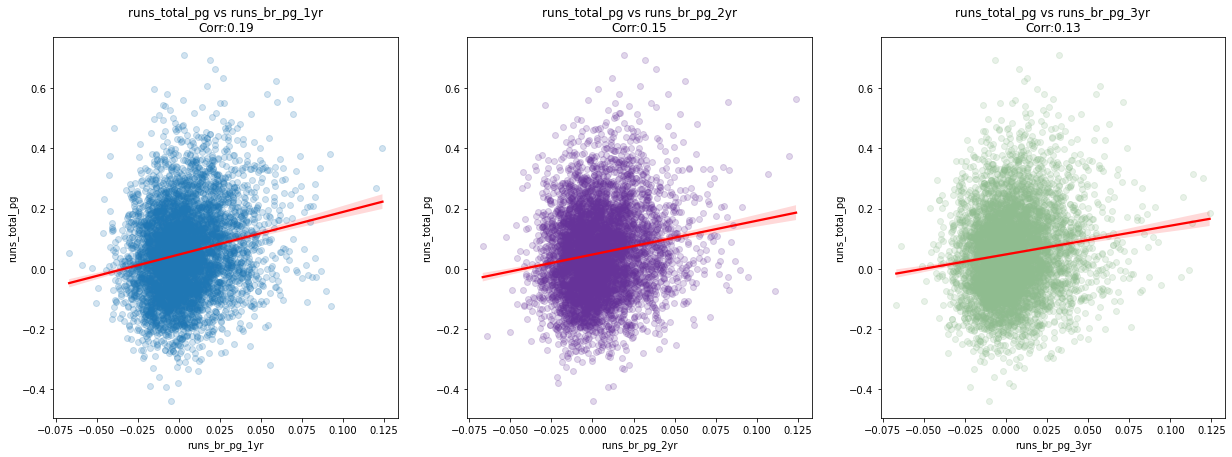

In [20]:
triple_regplot(['runs_br_pg_1yr','runs_br_pg_2yr','runs_br_pg_3yr'],
               'runs_total_pg')

In [21]:
rdf.corr().loc[['runs_br_pg_1yr','runs_br_pg_2yr','runs_br_pg_3yr'],
               ['runs_br_pg_1yr','runs_br_pg_2yr','runs_br_pg_3yr']]

,runs_br_pg_1yr,runs_br_pg_2yr,runs_br_pg_3yr
runs_br_pg_1yr,1.000000,0.472067,0.436826
runs_br_pg_2yr,0.472067,1.000000,0.470825
runs_br_pg_3yr,0.436826,0.470825,1.000000


`runs_dp_pg`

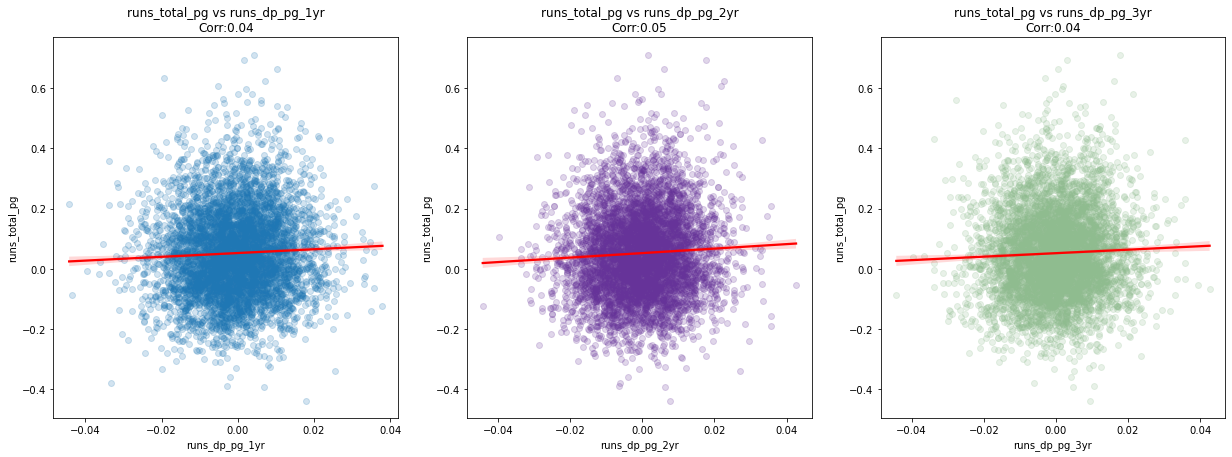

In [22]:
triple_regplot(['runs_dp_pg_1yr','runs_dp_pg_2yr','runs_dp_pg_3yr'],
               'runs_total_pg')

In [23]:
# drop
rdf.drop(['runs_dp_pg_1yr','runs_dp_pg_2yr','runs_dp_pg_3yr'],
         axis=1, inplace=True)

`runs_defense_pg`

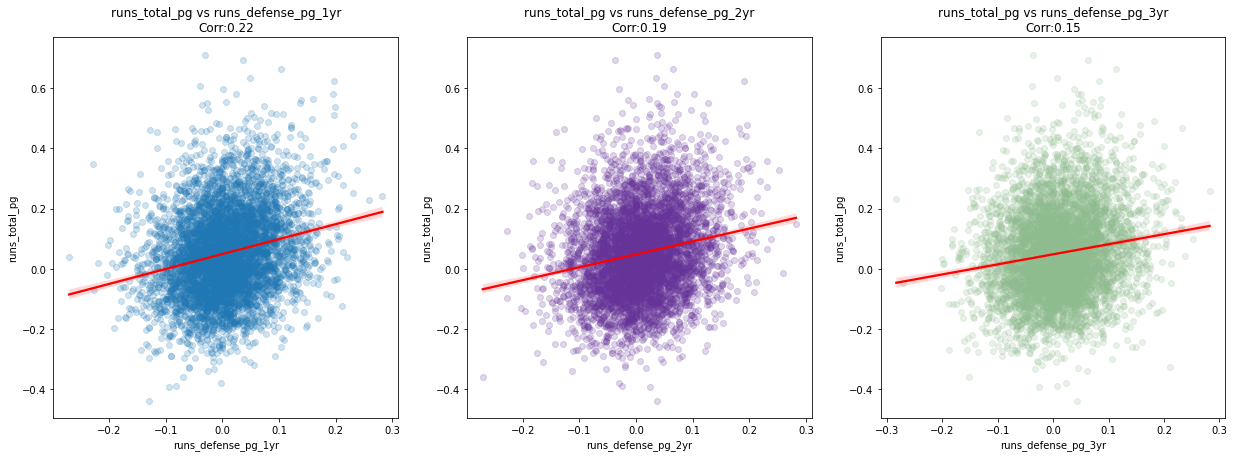

In [24]:
triple_regplot(['runs_defense_pg_1yr','runs_defense_pg_2yr'
                ,'runs_defense_pg_3yr'], 'runs_total_pg')

In [25]:
rdf.corr().loc[['runs_defense_pg_1yr','runs_defense_pg_2yr'
                ,'runs_defense_pg_3yr'],
               ['runs_defense_pg_1yr','runs_defense_pg_2yr'
                ,'runs_defense_pg_3yr']]

,runs_defense_pg_1yr,runs_defense_pg_2yr,runs_defense_pg_3yr
runs_defense_pg_1yr,1.000000,0.426514,0.351271
runs_defense_pg_2yr,0.426514,1.000000,0.427656
runs_defense_pg_3yr,0.351271,0.427656,1.000000


`runs_position_pg`

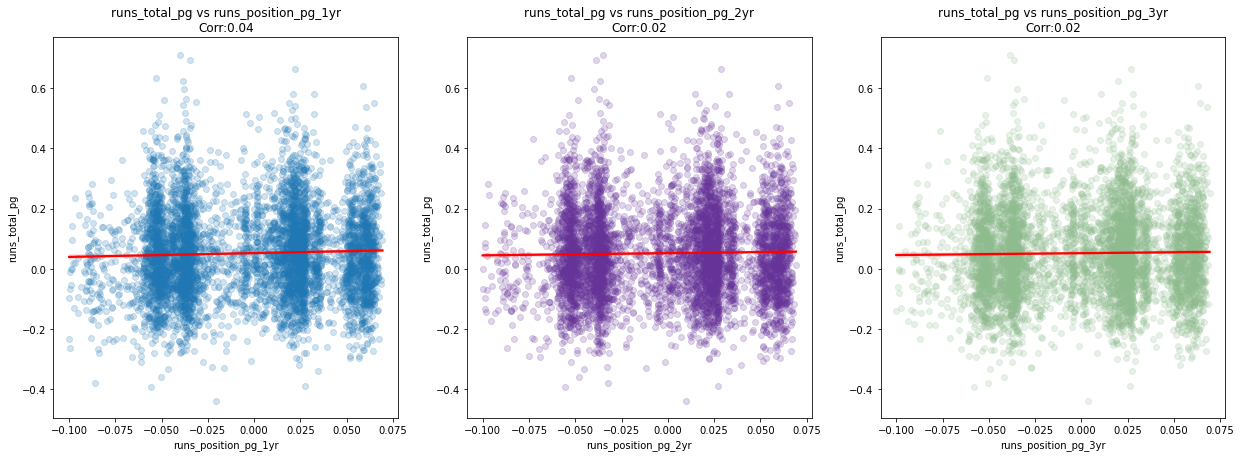

In [26]:
triple_regplot(['runs_position_pg_1yr','runs_position_pg_2yr'
                ,'runs_position_pg_3yr'], 'runs_total_pg')

In [27]:
rdf.drop(['runs_position_pg_1yr','runs_position_pg_2yr'
                ,'runs_position_pg_3yr'], 
         axis=1, inplace=True)

`percent_team_gp`

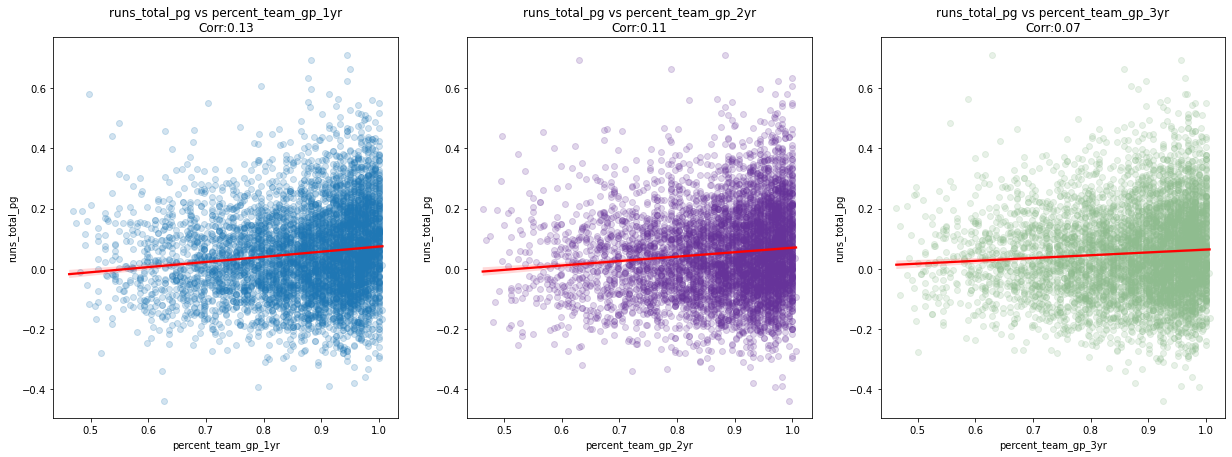

In [28]:
triple_regplot(['percent_team_gp_1yr','percent_team_gp_2yr'
                ,'percent_team_gp_3yr'], 'runs_total_pg')

In [29]:
rdf.corr().loc[['percent_team_gp_1yr','percent_team_gp_2yr'
                ,'percent_team_gp_3yr'],
               ['percent_team_gp_1yr','percent_team_gp_2yr'
                ,'percent_team_gp_3yr']]

,percent_team_gp_1yr,percent_team_gp_2yr,percent_team_gp_3yr
percent_team_gp_1yr,1.000000,0.258347,0.199917
percent_team_gp_2yr,0.258347,1.000000,0.245208
percent_team_gp_3yr,0.199917,0.245208,1.000000


In [30]:
# drop
rdf.drop('percent_team_gp_3yr',
         axis=1,
         inplace=True)

`pa_per_team_gp`

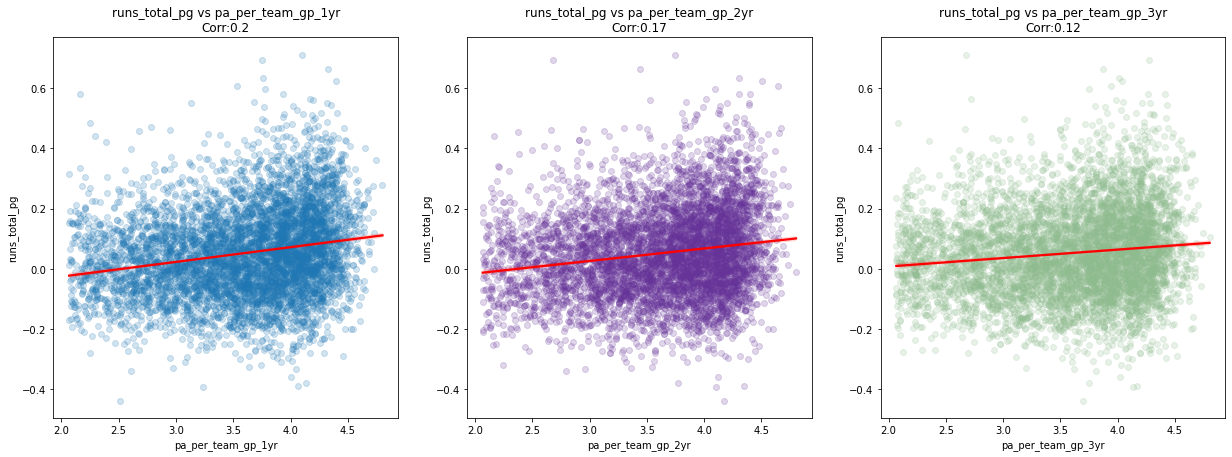

In [31]:
triple_regplot(['pa_per_team_gp_1yr','pa_per_team_gp_2yr'
                ,'pa_per_team_gp_3yr'], 'runs_total_pg')

In [32]:
rdf.corr().loc[['pa_per_team_gp_1yr','pa_per_team_gp_2yr'
                ,'pa_per_team_gp_3yr'],
               ['pa_per_team_gp_1yr','pa_per_team_gp_2yr'
                ,'pa_per_team_gp_3yr']]

,pa_per_team_gp_1yr,pa_per_team_gp_2yr,pa_per_team_gp_3yr
pa_per_team_gp_1yr,1.000000,0.435871,0.343139
pa_per_team_gp_2yr,0.435871,1.000000,0.423959
pa_per_team_gp_3yr,0.343139,0.423959,1.000000


`inn_per_team_gp`

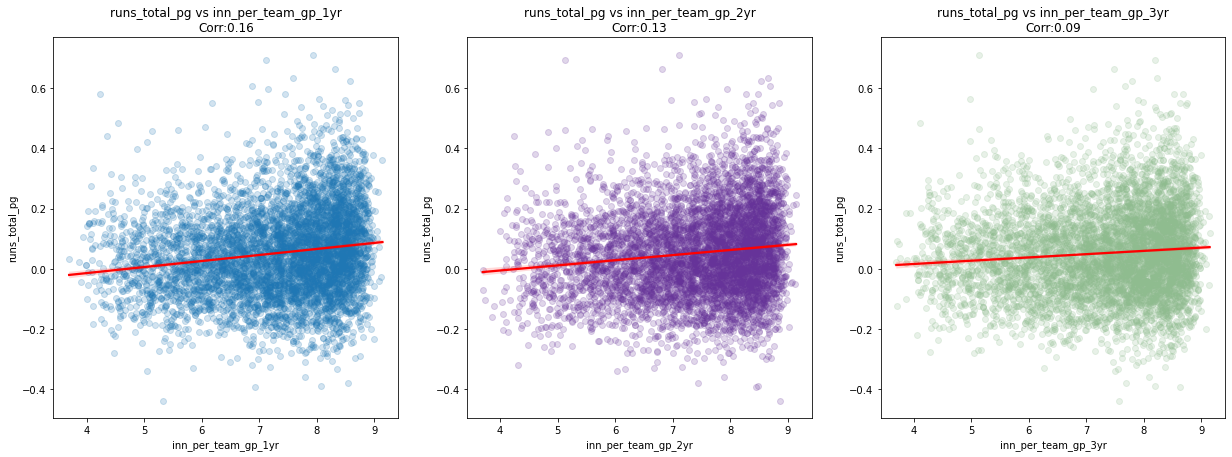

In [33]:
triple_regplot(['inn_per_team_gp_1yr','inn_per_team_gp_2yr'
                ,'inn_per_team_gp_3yr'], 'runs_total_pg')

In [34]:
rdf.corr().loc[['inn_per_team_gp_1yr','inn_per_team_gp_2yr'
                ,'inn_per_team_gp_3yr'],
              ['inn_per_team_gp_1yr','inn_per_team_gp_2yr'
                ,'inn_per_team_gp_3yr']]

,inn_per_team_gp_1yr,inn_per_team_gp_2yr,inn_per_team_gp_3yr
inn_per_team_gp_1yr,1.000000,0.376293,0.284473
inn_per_team_gp_2yr,0.376293,1.000000,0.359600
inn_per_team_gp_3yr,0.284473,0.359600,1.000000


In [35]:
# drop
rdf.drop('inn_per_team_gp_3yr',
         axis=1,
         inplace=True)

positional shares

In [36]:
positional_cols = ['g_c_share_1yr', 'g_c_share_2yr',
       'g_c_share_3yr', 'g_1b_share_1yr', 'g_1b_share_2yr', 'g_1b_share_3yr',
       'g_2b_share_1yr', 'g_2b_share_2yr', 'g_2b_share_3yr', 'g_3b_share_1yr',
       'g_3b_share_2yr', 'g_3b_share_3yr', 'g_ss_share_1yr', 'g_ss_share_2yr',
       'g_ss_share_3yr', 'g_cf_share_1yr', 'g_cf_share_2yr', 'g_cf_share_3yr',
       'g_dh_share_1yr', 'g_dh_share_2yr', 'g_dh_share_3yr', 'g_cof_share_1yr',
       'g_cof_share_2yr', 'g_cof_share_3yr']

In [37]:
rdf.corr().loc[positional_cols, 'runs_total_pg'].to_frame()

,runs_total_pg
g_c_share_1yr,0.016469
g_c_share_2yr,0.014288
g_c_share_3yr,0.014604
g_1b_share_1yr,-0.010202
g_1b_share_2yr,-0.013972
g_1b_share_3yr,-0.015134
g_2b_share_1yr,-0.011582
g_2b_share_2yr,-0.013951
g_2b_share_3yr,-0.013755
g_3b_share_1yr,0.052315


# Year DF Creation

In [11]:
ydf = batpos.copy()

In [12]:
ydf = ydf[['player_id','year_id','name_common',
       'opprpg','opprpg_1yr','opprpg_2yr','opprpg_3yr']]

In [17]:
ydf.to_csv('../data/ydf.csv')